In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
asthma = pd.read_csv("asthma_disease_data.csv")

In [3]:
#Viewing the first 5 dataset
asthma.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [4]:
#Viewing the last 5 dataset
asthma.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid
2391,7425,26,1,0,0,28.123021,1,1.613138,7.412878,8.512253,...,2.280613,2.453284,1,1,0,0,1,0,0,Dr_Confid


In [5]:
#Checking the shape of the dataset
asthma.shape

(2392, 29)

In [6]:
#Summary Statistics
asthma.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2392.0,6229.500000,690.655244,5034.000000,5631.750000,6229.500000,6827.250000,7425.000000
Age,2392.0,42.137960,21.606655,5.000000,23.000000,42.000000,61.000000,79.000000
Gender,2392.0,0.493311,0.500060,0.000000,0.000000,0.000000,1.000000,1.000000
Ethnicity,2392.0,0.669732,0.986120,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2392.0,1.307274,0.898242,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2392.0,27.244877,7.201628,15.031803,20.968313,27.052202,33.555903,39.985611
Smoking,2392.0,0.141722,0.348838,0.000000,0.000000,0.000000,0.000000,1.000000
PhysicalActivity,2392.0,5.051786,2.903574,0.001740,2.578333,5.016881,7.540234,9.995809
DietQuality,2392.0,5.022867,2.909980,0.003031,2.432043,5.115383,7.544216,9.999904
SleepQuality,2392.0,7.019012,1.732475,4.001437,5.498500,6.975839,8.526950,9.996235


In [7]:
# Information on the dataset
asthma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [8]:
#Checking for missing values
asthma.isnull()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2388,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
asthma.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [10]:
#Checking for duplicates
asthma[asthma.duplicated()]

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge


In [11]:
asthma.duplicated().sum()

0

In [12]:
asthma = pd.DataFrame(asthma)
asthma

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid


In [13]:
# Drop irrelevant columns
asthma.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)

In [14]:
# Apply the KMeans algorithm and evaluate using the elbow method and silhouette score
inertia = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

K = range(2, 11)  # Starting from 2 because silhouette score is not defined for k=1

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(asthma)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(asthma, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(asthma, kmeans.labels_))
    calinski_harabasz_scores.append(calinski_harabasz_score(asthma, kmeans.labels_))

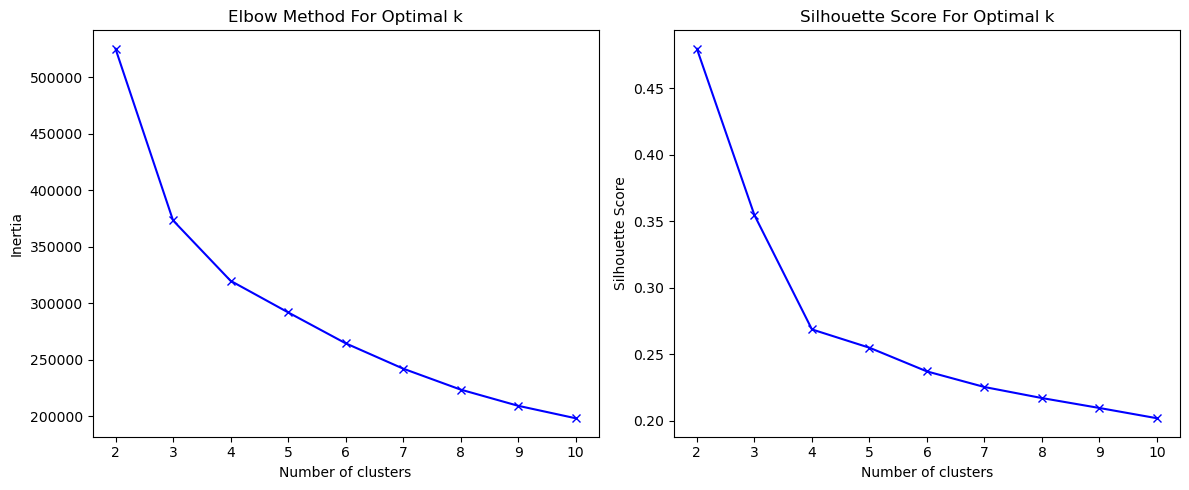

In [15]:
# Plot the elbow method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')

plt.tight_layout()
plt.show()

In [16]:
# Determine the best number of clusters using the silhouette score
optimal_k = K[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters based on silhouette score is: {optimal_k}")

# Fit the final KMeans model with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(asthma)

# Add the cluster labels to the original data
asthma['Cluster'] = kmeans_optimal.labels_

# Evaluate the final clustering
final_inertia = kmeans_optimal.inertia_
final_silhouette_score = silhouette_score(asthma, kmeans_optimal.labels_)
final_davies_bouldin_score = davies_bouldin_score(asthma, kmeans_optimal.labels_)
final_calinski_harabasz_score = calinski_harabasz_score(asthma, kmeans_optimal.labels_)

print(f"Final Inertia: {final_inertia}")
print(f"Final Silhouette Score: {final_silhouette_score}")
print(f"Final Davies-Bouldin Index: {final_davies_bouldin_score}")
print(f"Final Calinski-Harabasz Index: {final_calinski_harabasz_score}")

The optimal number of clusters based on silhouette score is: 2
Final Inertia: 525134.813602857
Final Silhouette Score: 0.47981302103279216
Final Davies-Bouldin Index: 0.7613469952434163
Final Calinski-Harabasz Index: 3825.7985877750475


In [17]:
# Use PCA for dimensionality reduction

# Apply PCA and keep the top 2 principal components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(asthma)

# Apply KMeans on the reduced data
inertia_pca = []
silhouette_scores_pca = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia_pca.append(kmeans.inertia_)
    silhouette_scores_pca.append(silhouette_score(pca_data, kmeans.labels_))
    silhouette_scores.append(silhouette_score(asthma, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(asthma, kmeans.labels_))
    calinski_harabasz_scores.append(calinski_harabasz_score(asthma, kmeans.labels_))

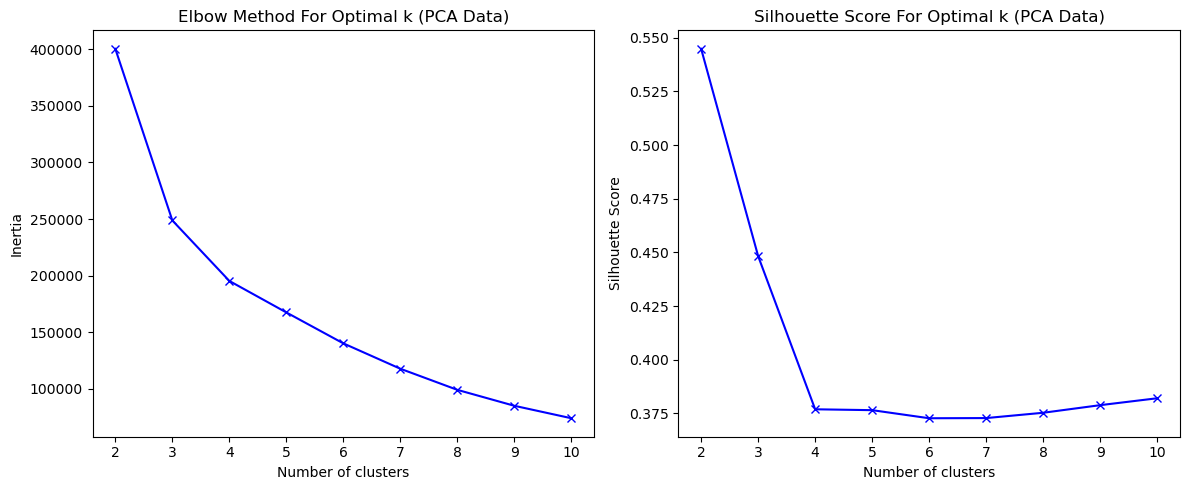

In [18]:
# Plot the elbow method for PCA data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia_pca, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k (PCA Data)')

# Plot the silhouette scores for PCA data
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores_pca, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k (PCA Data)')

plt.tight_layout()
plt.show()

In [19]:
# Determine the best number of clusters using the silhouette score for PCA data
optimal_k_pca = K[np.argmax(silhouette_scores_pca)]
print(f"The optimal number of clusters based on silhouette score for PCA data is: {optimal_k_pca}")

# Fit the final KMeans model with the optimal number of clusters on PCA data
kmeans_optimal_pca = KMeans(n_clusters=optimal_k_pca, random_state=42)
kmeans_optimal_pca.fit(pca_data)

# Add the cluster labels to the original data
asthma['Cluster_PCA'] = kmeans_optimal_pca.labels_

# Evaluate the final clustering for PCA data
final_inertia_pca = kmeans_optimal_pca.inertia_
final_silhouette_score_pca = silhouette_score(pca_data, kmeans_optimal_pca.labels_)
final_davies_bouldin_score_pca = davies_bouldin_score(pca_data, kmeans_optimal_pca.labels_)
final_calinski_harabasz_score_pca = calinski_harabasz_score(pca_data, kmeans_optimal_pca.labels_)

print(f"Final Inertia (PCA): {final_inertia_pca}")
print(f"Final Silhouette Score (PCA): {final_silhouette_score_pca}")
print(f"Final Davies-Bouldin Index (PCA): {final_davies_bouldin_score_pca}")
print(f"Final Calinski-Harabasz Index (PCA): {final_calinski_harabasz_score_pca}")

The optimal number of clusters based on silhouette score for PCA data is: 2
Final Inertia (PCA): 400303.4134417066
Final Silhouette Score (PCA): 0.5448829195171809
Final Davies-Bouldin Index (PCA): 0.6410608994370793
Final Calinski-Harabasz Index (PCA): 5018.579060996514


In [20]:
# Perform hierarchical clustering (Agglomerative Clustering)
linked = linkage(asthma, method='ward')

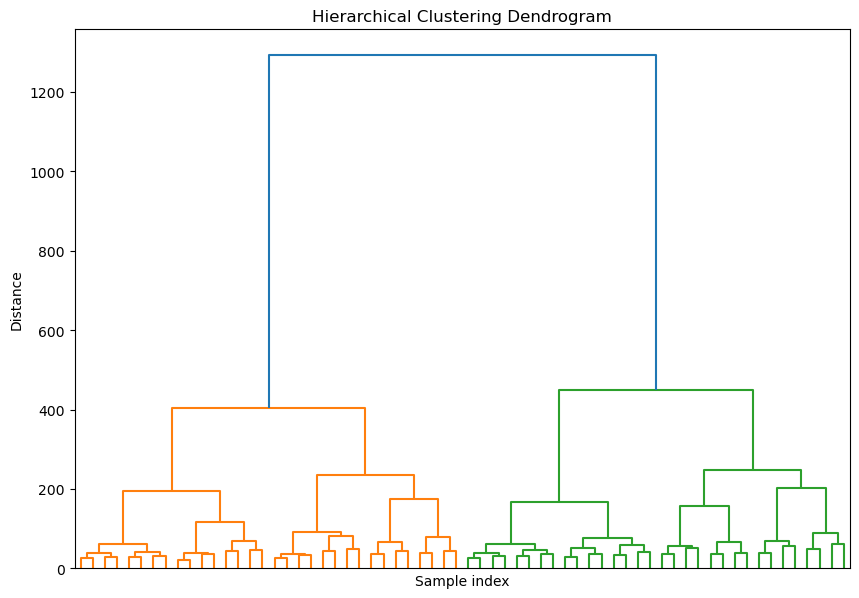

In [21]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', truncate_mode='level', p=5, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [22]:
# Silhouette Score Calculation
silhouette_scores = []

for nr_c in range(2, 16):  # Start from 2 clusters, as silhouette score requires at least 2 clusters
    agglomerative = AgglomerativeClustering(n_clusters=nr_c)
    agglomerative_labels = agglomerative.fit_predict(asthma)
    silhouette_scores.append(silhouette_score(asthma, agglomerative_labels))

In [23]:
# Elbow method
cluster_range = range(2, 16)
silhouette_scores_subset = silhouette_scores[:14]  # Take subset as silhouette scores are calculated from 2 to 15 clusters

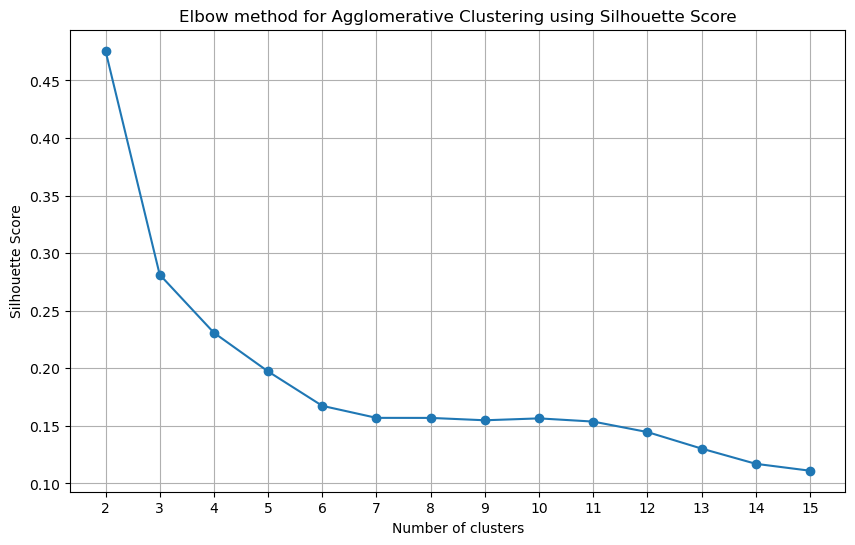

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores_subset, marker='o')
plt.title('Elbow method for Agglomerative Clustering using Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 16, step=1))  # Adjust ticks for better visualization
plt.grid(True)
plt.show()

In [25]:
# Find the optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 as we started from 2 clusters
print("Optimal number of clusters:", optimal_clusters)

Optimal number of clusters: 2


In [26]:
# Agglomerative Clustering with optimal number of clusters
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters)
agglomerative_labels = agglomerative.fit_predict(asthma)


In [27]:
# Silhouette score for Agglomerative Clustering
agglomerative_score = silhouette_score(asthma, agglomerative_labels)
print("Agglomerative Clustering Silhouette score:", agglomerative_score)

Agglomerative Clustering Silhouette score: 0.47575909052168047
